In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

#from f_detrend import detrend_fuction

sn.set_style('whitegrid')
%matplotlib inline

In [32]:
# Expanded and modivfied version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))

In [33]:
dates = []
for year in range(1987,2023):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

# Parent Age 35-40

 ## Children Age <5

In [34]:
coefs_par_a3540_p5 = []
coefs_mar_a3540_p5 = []
coefs_parxmar_a3540_p5 = []
coefs_div_a3540_p5 = []
bounds_par_a3540_p5 = []
bounds_mar_a3540_p5 = []
bounds_parxmar_a3540_p5 = []
bounds_div_a3540_p5 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_5.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_5'==words[0]:
        coefs_par_a3540_p5.append(float(words[2]))
        bounds_par_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3540_p5.append(float(words[2]))
        bounds_mar_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_parxmar_a3540_p5.append(float(words[2]))
        bounds_parxmar_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3540_p5.append(float(words[2]))
        bounds_div_a3540_p5.append((float(words[-2]),float(words[-1])))
bounds_par_a3540_p5 = np.array(bounds_par_a3540_p5)
coefs_par_a3540_p5 = np.array(coefs_par_a3540_p5)
bounds_mar_a3540_p5 = np.array(bounds_mar_a3540_p5)
coefs_mar_a3540_p5 = np.array(coefs_mar_a3540_p5)
bounds_parxmar_a3540_p5 = np.array(bounds_parxmar_a3540_p5)
coefs_parxmar_a3540_p5 = np.array(coefs_parxmar_a3540_p5)
bounds_div_a3540_p5 = np.array(bounds_div_a3540_p5)
coefs_div_a3540_p5 = np.array(coefs_div_a3540_p5)

In [35]:
coefs_m_par_a3540_p5 = []
coefs_m_mar_a3540_p5 = []
coefs_m_parxmar_a3540_p5 = []
coefs_m_div_a3540_p5 = []
bounds_m_par_a3540_p5 = []
bounds_m_mar_a3540_p5 = []
bounds_m_parxmar_a3540_p5 = []
bounds_m_div_a3540_p5 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_5.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_5'==words[0]:        
        coefs_m_par_a3540_p5.append(float(words[2]))
        bounds_m_par_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3540_p5.append(float(words[2]))
        bounds_m_mar_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_m_parxmar_a3540_p5.append(float(words[2]))
        bounds_m_parxmar_a3540_p5.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3540_p5.append(float(words[2]))
        bounds_m_div_a3540_p5.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3540_p5 = np.array(bounds_m_par_a3540_p5)
coefs_m_par_a3540_p5 = np.array(coefs_m_par_a3540_p5)
bounds_m_mar_a3540_p5 = np.array(bounds_m_mar_a3540_p5)
coefs_m_mar_a3540_p5 = np.array(coefs_m_mar_a3540_p5)
bounds_m_parxmar_a3540_p5 = np.array(bounds_m_parxmar_a3540_p5)
coefs_m_parxmar_a3540_p5 = np.array(coefs_m_parxmar_a3540_p5)
bounds_m_div_a3540_p5 = np.array(bounds_m_div_a3540_p5)
coefs_m_div_a3540_p5 = np.array(coefs_m_div_a3540_p5)

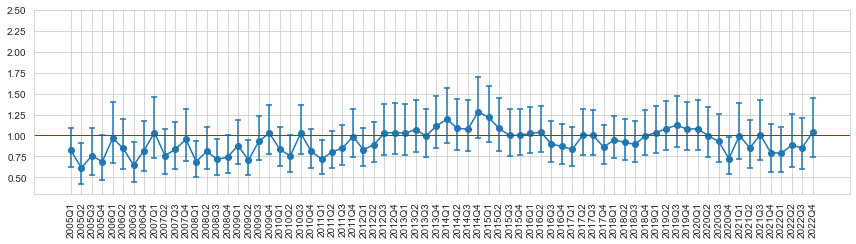

In [36]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3540_p5,marker='o')
plt.scatter(qs,bounds_par_a3540_p5[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3540_p5[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3540_p5.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3540_p5[i,0],bounds_par_a3540_p5[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_women_parent_time_age3540_parent_5_long.pdf',format='pdf',bbox_inches='tight')
plt.show()

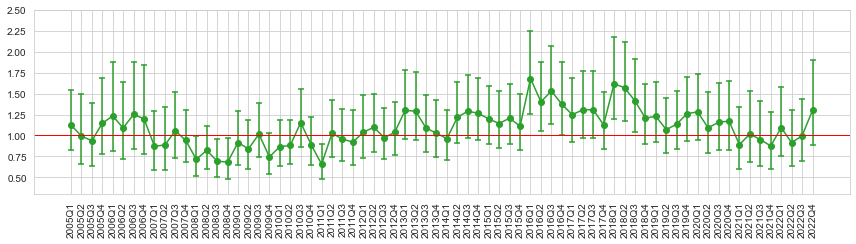

In [37]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3540_p5,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3540_p5[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3540_p5[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3540_p5.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3540_p5[i,0],bounds_m_par_a3540_p5[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_men_parent_time_age3540_parent_5_long.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Children Age <10

In [38]:
coefs_par_a3540_p10 = []
coefs_mar_a3540_p10 = []
coefs_parxmar_a3540_p10 = []
coefs_div_a3540_p10 = []
bounds_par_a3540_p10 = []
bounds_mar_a3540_p10 = []
bounds_parxmar_a3540_p10 = []
bounds_div_a3540_p10 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_10.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_10'==words[0]:
        coefs_par_a3540_p10.append(float(words[2]))
        bounds_par_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3540_p10.append(float(words[2]))
        bounds_mar_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_10'==words[0]:
        coefs_parxmar_a3540_p10.append(float(words[2]))
        bounds_parxmar_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3540_p10.append(float(words[2]))
        bounds_div_a3540_p10.append((float(words[-2]),float(words[-1])))
bounds_par_a3540_p10 = np.array(bounds_par_a3540_p10)
coefs_par_a3540_p10 = np.array(coefs_par_a3540_p10)
bounds_mar_a3540_p10 = np.array(bounds_mar_a3540_p10)
coefs_mar_a3540_p10 = np.array(coefs_mar_a3540_p10)
bounds_parxmar_a3540_p10 = np.array(bounds_parxmar_a3540_p10)
coefs_parxmar_a3540_p10 = np.array(coefs_parxmar_a3540_p10)
bounds_div_a3540_p10 = np.array(bounds_div_a3540_p10)
coefs_div_a3540_p10 = np.array(coefs_div_a3540_p10)

In [39]:
coefs_m_par_a3540_p10 = []
coefs_m_mar_a3540_p10 = []
coefs_m_parxmar_a3540_p10 = []
coefs_m_div_a3540_p10 = []
bounds_m_par_a3540_p10 = []
bounds_m_mar_a3540_p10 = []
bounds_m_parxmar_a3540_p10 = []
bounds_m_div_a3540_p10 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_10.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_10'==words[0]:        
        coefs_m_par_a3540_p10.append(float(words[2]))
        bounds_m_par_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3540_p10.append(float(words[2]))
        bounds_m_mar_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_10'==words[0]:
        coefs_m_parxmar_a3540_p10.append(float(words[2]))
        bounds_m_parxmar_a3540_p10.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3540_p10.append(float(words[2]))
        bounds_m_div_a3540_p10.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3540_p10 = np.array(bounds_m_par_a3540_p10)
coefs_m_par_a3540_p10 = np.array(coefs_m_par_a3540_p10)
bounds_m_mar_a3540_p10 = np.array(bounds_m_mar_a3540_p10)
coefs_m_mar_a3540_p10 = np.array(coefs_m_mar_a3540_p10)
bounds_m_parxmar_a3540_p10 = np.array(bounds_m_parxmar_a3540_p10)
coefs_m_parxmar_a3540_p10 = np.array(coefs_m_parxmar_a3540_p10)
bounds_m_div_a3540_p10 = np.array(bounds_m_div_a3540_p10)
coefs_m_div_a3540_p10 = np.array(coefs_m_div_a3540_p10)

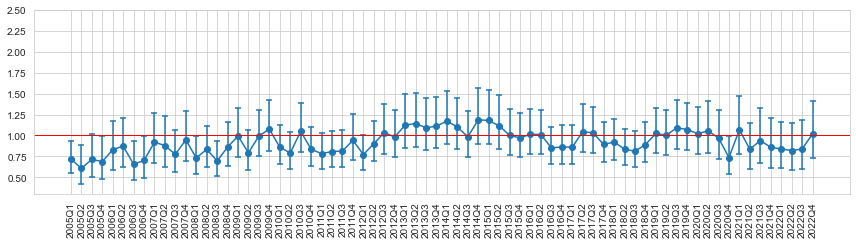

In [40]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3540_p10,marker='o')
plt.scatter(qs,bounds_par_a3540_p10[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3540_p10[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3540_p10.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3540_p10[i,0],bounds_par_a3540_p10[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_women_parent_time_age3540_parent_10_long.pdf',format='pdf',bbox_inches='tight')
plt.show()

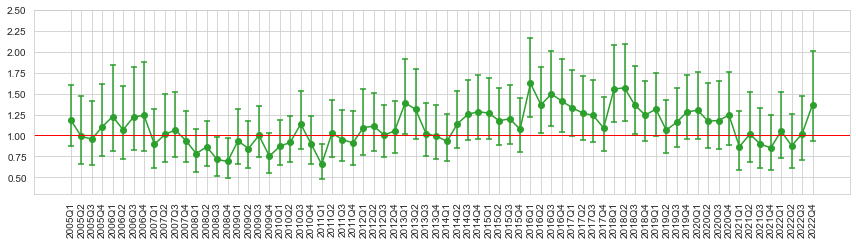

In [41]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3540_p10,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3540_p10[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3540_p10[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3540_p10.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3540_p10[i,0],bounds_m_par_a3540_p10[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_men_parent_time_age3540_parent_10_long.pdf',format='pdf',bbox_inches='tight')
plt.show()

## Children Age <15 

In [42]:
coefs_par_a3540_p15 = []
coefs_mar_a3540_p15 = []
coefs_parxmar_a3540_p15 = []
coefs_div_a3540_p15 = []
bounds_par_a3540_p15 = []
bounds_mar_a3540_p15 = []
bounds_parxmar_a3540_p15 = []
bounds_div_a3540_p15 = []
qs = []
cc = 130
f = open('./regtabs/prob_perm_stocks_w_age3540_parent_15.log','r')
for line in f:
    words = line.split()
    #print(words)
    if  len(words)>1 and words[0]=='permanent' and words[1]=='|':
        #indx_if = words.index("if")
        #ciclo = int(words[indx_if+1][7:10])
        ciclo = cc
        qs.append(date_dict[ciclo])
        cc +=1
    if len(words)>0 and 'parent_15'==words[0]:
        coefs_par_a3540_p15.append(float(words[2]))
        bounds_par_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar_a3540_p15.append(float(words[2]))
        bounds_mar_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_15'==words[0]:
        coefs_parxmar_a3540_p15.append(float(words[2]))
        bounds_parxmar_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div_a3540_p15.append(float(words[2]))
        bounds_div_a3540_p15.append((float(words[-2]),float(words[-1])))
bounds_par_a3540_p15 = np.array(bounds_par_a3540_p15)
coefs_par_a3540_p15 = np.array(coefs_par_a3540_p15)
bounds_mar_a3540_p15 = np.array(bounds_mar_a3540_p15)
coefs_mar_a3540_p15 = np.array(coefs_mar_a3540_p15)
bounds_parxmar_a3540_p15 = np.array(bounds_parxmar_a3540_p15)
coefs_parxmar_a3540_p15 = np.array(coefs_parxmar_a3540_p15)
bounds_div_a3540_p15 = np.array(bounds_div_a3540_p15)
coefs_div_a3540_p15 = np.array(coefs_div_a3540_p15)

In [43]:
coefs_m_par_a3540_p15 = []
coefs_m_mar_a3540_p15 = []
coefs_m_parxmar_a3540_p15 = []
coefs_m_div_a3540_p15 = []
bounds_m_par_a3540_p15 = []
bounds_m_mar_a3540_p15 = []
bounds_m_parxmar_a3540_p15 = []
bounds_m_div_a3540_p15 = []
f = open('./regtabs/prob_perm_stocks_m_age3540_parent_15.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_15'==words[0]:        
        coefs_m_par_a3540_p15.append(float(words[2]))
        bounds_m_par_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar_a3540_p15.append(float(words[2]))
        bounds_m_mar_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_15'==words[0]:
        coefs_m_parxmar_a3540_p15.append(float(words[2]))
        bounds_m_parxmar_a3540_p15.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div_a3540_p15.append(float(words[2]))
        bounds_m_div_a3540_p15.append((float(words[-2]),float(words[-1])))
bounds_m_par_a3540_p15 = np.array(bounds_m_par_a3540_p15)
coefs_m_par_a3540_p15 = np.array(coefs_m_par_a3540_p15)
bounds_m_mar_a3540_p15 = np.array(bounds_m_mar_a3540_p15)
coefs_m_mar_a3540_p15 = np.array(coefs_m_mar_a3540_p15)
bounds_m_parxmar_a3540_p15 = np.array(bounds_m_parxmar_a3540_p15)
coefs_m_parxmar_a3540_p15 = np.array(coefs_m_parxmar_a3540_p15)
bounds_m_div_a3540_p15 = np.array(bounds_m_div_a3540_p15)
coefs_m_div_a3540_p15 = np.array(coefs_m_div_a3540_p15)

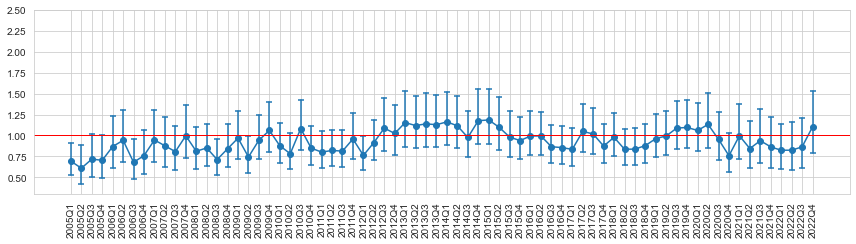

In [44]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, women",fontsize=16)
plt.plot(qs,coefs_par_a3540_p15,marker='o')
plt.scatter(qs,bounds_par_a3540_p15[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par_a3540_p15[:,1],marker='_',color=colors[0])
for i in range(coefs_par_a3540_p15.size):
    plt.plot((qs[i],qs[i]),(bounds_par_a3540_p15[i,0],bounds_par_a3540_p15[i,1]),c=colors[0])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_women_parent_time_age3540_parent_15_long.pdf',format='pdf',bbox_inches='tight')
plt.show()

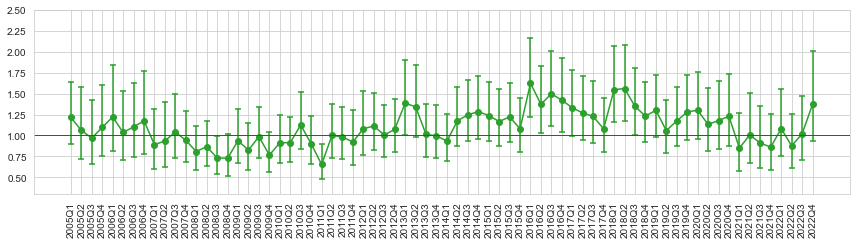

In [45]:
colors = sn.color_palette()
plt.figure(figsize=(12,3.5))
#plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par_a3540_p15,color=colors[2],marker='o')
plt.scatter(qs,bounds_m_par_a3540_p15[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par_a3540_p15[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par_a3540_p15.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par_a3540_p15[i,0],bounds_m_par_a3540_p15[i,1]),c=colors[2])
plt.xticks(rotation=90)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.3,2.5)
plt.tight_layout()
plt.savefig('./plots_logit/prob_men_parent_time_age3540_parent_15_long.pdf',format='pdf',bbox_inches='tight')
plt.show()